In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})

In [56]:
depressed_df = pd.read_csv("data/depression/users_timelines.csv")

In [57]:
depressed_df.drop_duplicates(inplace=True)

In [70]:
depressed_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'processed_time', 'year', 'month', 'day'],
      dtype='object')

In [58]:
depressed_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1435429475567607814,1435424118191575045,2021-09-08 02:27:10 UTC,2021-09-08,02:27:10,0,1391103833695158272,starkorla,orla_stark,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'msworldwide69', 'name': 'sar...",NaN,NaN,NaN,NaN
1,1435429339676299264,1435424118191575045,2021-09-08 02:26:38 UTC,2021-09-08,02:26:38,0,1391103833695158272,starkorla,orla_stark,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'msworldwide69', 'name': 'sar...",NaN,NaN,NaN,NaN
2,1435028936258248706,1434823227180822535,2021-09-06 23:55:34 UTC,2021-09-06,23:55:34,0,1391103833695158272,starkorla,orla_stark,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ilyhariah', 'name': 'FaZe ha...",NaN,NaN,NaN,NaN
3,1435028173553504257,1435021286921621505,2021-09-06 23:52:32 UTC,2021-09-06,23:52:32,0,1391103833695158272,starkorla,orla_stark,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Quackity', 'name': 'Quackity...",NaN,NaN,NaN,NaN
4,1434766350342189056,1434527317741686785,2021-09-06 06:32:09 UTC,2021-09-06,06:32:09,0,1391103833695158272,starkorla,orla_stark,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ignoredream', 'name': 'apple...",NaN,NaN,NaN,NaN


In [59]:
depressed_df["processed_time"] = depressed_df.apply(lambda row: int(row["time"][:2]) *60  +int(row["time"][3:5]) , axis= 1  )
depressed_df["year"] = depressed_df.apply(lambda row: int(row["date"][:4]) , axis= 1  )
depressed_df["month"] = depressed_df.apply(lambda row: int(row["date"][5:7]) , axis= 1  )
depressed_df["day"] = depressed_df.apply(lambda row: int(row["date"][8:10]) , axis= 1  )

<AxesSubplot:xlabel='processed_time', ylabel='Count'>

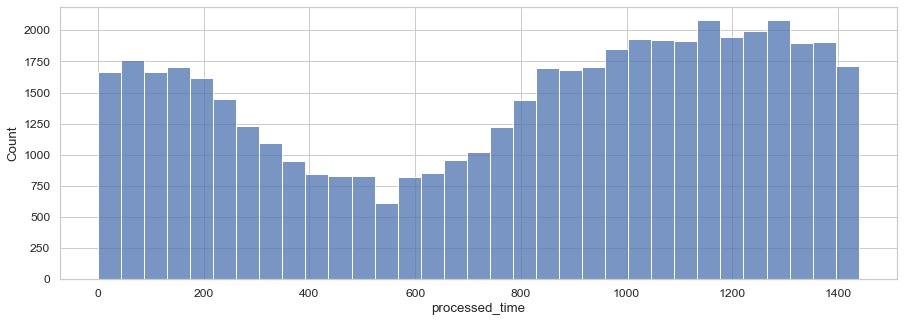

In [60]:
sns.histplot( depressed_df["processed_time"])

/Users/abdullahalsaidi/miniconda3/envs/stowk-ml/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='processed_time', ylabel='Density'>

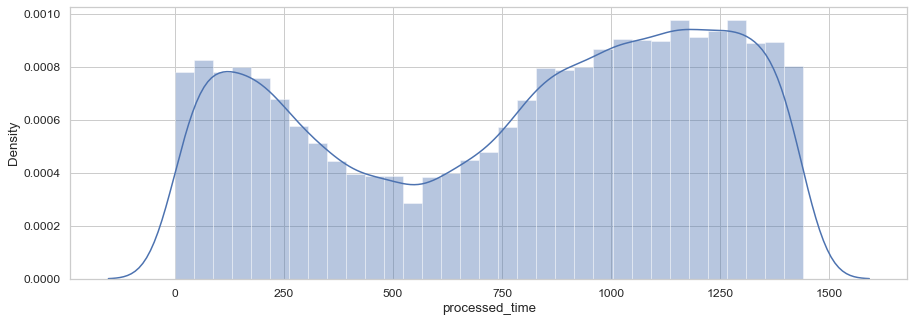

In [61]:
sns.distplot( depressed_df["processed_time"])

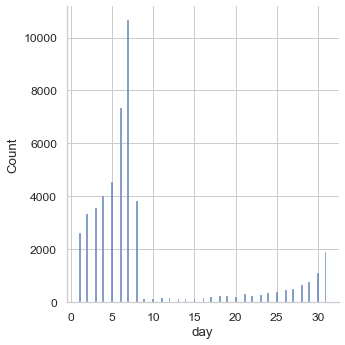

In [62]:
sns.displot( depressed_df["day"])

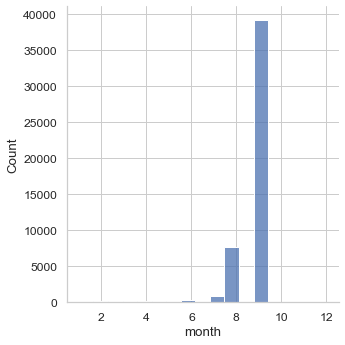

In [63]:
sns.displot( depressed_df["month"])

/Users/abdullahalsaidi/miniconda3/envs/stowk-ml/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

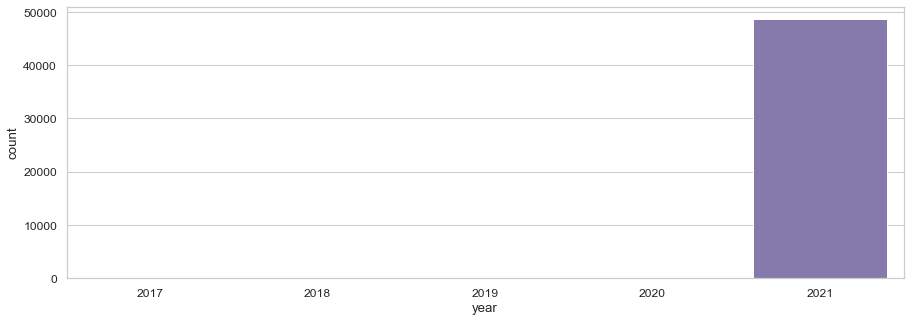

In [68]:
sns.countplot(depressed_df.year)


/Users/abdullahalsaidi/miniconda3/envs/stowk-ml/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='language', ylabel='count'>

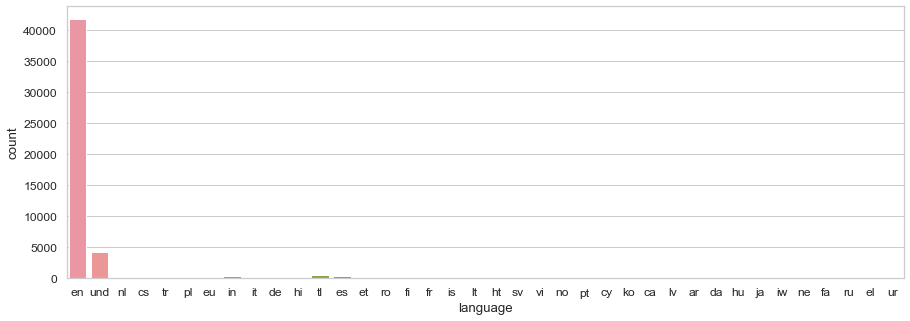

In [71]:
sns.countplot(depressed_df.language)

In [ ]:
depressed_df['date'] = pd.to_datetime(depressed_df['date'])


In [ ]:
hour = [ df['date'][i].hour for i in range(len(df['date'])) ]
df['hour'] = hour
df.head()

In [ ]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [73]:
depressed_df = depressed_df[depressed_df["language"] == "en"]

In [74]:
len(depressed_df.user_id.unique())

684

In [75]:
len(depressed_df)

41789

In [95]:
from copy import deepcopy
text_data = deepcopy(depressed_df)



In [96]:
desired_columns = ["tweet"]
text_data = text_data[desired_columns]

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import string
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# nltk.download()

In [ ]:
all_words = ' '.join([text for text in text_data['tweet']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
text_data['Clean_TweetText'] = text_data['tweet'].str.replace("@", "") 
# Removing links
text_data['Clean_TweetText'] = text_data['tweet'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
text_data['Clean_TweetText'] = text_data['tweet'].str.replace("[^a-zA-Z]", " ") 
# Remove stop words
import nltk
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
text_data['Clean_TweetText'] = text_data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
text_data.head()

In [ ]:
# text_data['Clean_TweetText'] = text_data['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))


In [ ]:
# text_data['Clean_TweetText'] = text_data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
# text_data['Clean_TweetText'] = text_data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_data.head()